<a href="https://colab.research.google.com/github/swastik2475/code/blob/main/travel_time_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/trip_time_dataset_1000.csv")

In [3]:
df.head()

,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
0,383.70,Train,84.45,Afternoon,Rainy,272.60
1,70.90,Bus,36.05,Morning,Stormy,118.02
2,459.28,Airplane,512.71,Afternoon,Stormy,53.75
3,4.58,Bike,20.53,Night,Rainy,13.40
4,1676.03,Airplane,735.71,Morning,Rainy,136.69


In [4]:
df.isnull().sum()

,0
Distance_km,0
Travel_Mode,0
Avg_Speed_kmph,0
Day_Time,0
Weather,0
Trip_Time_min,0


In [5]:
df.tail()

,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
995,11.11,Bike,29.06,Night,Rainy,22.93
996,0.72,Walk,3.06,Morning,Rainy,14.19
997,10.63,Car,38.46,Night,Clear,16.58
998,11.33,Bus,26.35,Afternoon,Cloudy,25.79
999,1659.09,Airplane,624.63,Evening,Foggy,159.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Distance_km     1000 non-null   float64
 1   Travel_Mode     1000 non-null   object 
 2   Avg_Speed_kmph  1000 non-null   float64
 3   Day_Time        1000 non-null   object 
 4   Weather         1000 non-null   object 
 5   Trip_Time_min   1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [7]:
df.describe()


,Distance_km,Avg_Speed_kmph,Trip_Time_min
count,1000.000000,1000.000000,1000.000000
mean,220.423930,133.657540,69.246030
std,436.509036,233.793917,67.674236
min,0.530000,3.060000,3.740000
25%,6.097500,25.707500,19.487500
50%,24.145000,35.050000,44.895000
75%,177.205000,93.502500,99.290000
max,1986.840000,898.060000,351.790000


In [8]:
df.head()


,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
0,383.70,Train,84.45,Afternoon,Rainy,272.60
1,70.90,Bus,36.05,Morning,Stormy,118.02
2,459.28,Airplane,512.71,Afternoon,Stormy,53.75
3,4.58,Bike,20.53,Night,Rainy,13.40
4,1676.03,Airplane,735.71,Morning,Rainy,136.69


In [9]:
df['Distance_km']=df['Distance_km'].astype(int)

In [10]:
df['Distance_km']

,Distance_km
0,383
1,70
2,459
3,4
4,1676
...,...
995,11
996,0
997,10
998,11


In [11]:
df['Travel_Mode'].unique()

array(['Train', 'Bus', 'Airplane', 'Bike', 'Car', 'Walk', 'Auto'],
      dtype=object)

In [12]:
df['Travel_Mode']=df['Travel_Mode'].map({'Train':0,'Bus':1,'Airplane':2,'Bike':3,'Car':4,'Walk':5,'Auto':6})

In [13]:
df['Travel_Mode'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [14]:
df.head()


,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
0,383,0,84.45,Afternoon,Rainy,272.60
1,70,1,36.05,Morning,Stormy,118.02
2,459,2,512.71,Afternoon,Stormy,53.75
3,4,3,20.53,Night,Rainy,13.40
4,1676,2,735.71,Morning,Rainy,136.69


In [15]:
df['Avg_Speed_kmph']=df['Avg_Speed_kmph'].astype(int)

In [16]:
df


,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
0,383,0,84,Afternoon,Rainy,272.60
1,70,1,36,Morning,Stormy,118.02
2,459,2,512,Afternoon,Stormy,53.75
3,4,3,20,Night,Rainy,13.40
4,1676,2,735,Morning,Rainy,136.69
...,...,...,...,...,...,...
995,11,3,29,Night,Rainy,22.93
996,0,5,3,Morning,Rainy,14.19
997,10,4,38,Night,Clear,16.58
998,11,1,26,Afternoon,Cloudy,25.79


In [17]:
df['Day_Time'].unique()

array(['Afternoon', 'Morning', 'Night', 'Evening'], dtype=object)

In [18]:
df['Day_Time']=df['Day_Time'].map({'Afternoon':7,'Morning':8,'Night':9,'Evening':10})

In [19]:
df['Day_Time'].unique()


array([ 7,  8,  9, 10])

In [20]:
df

,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
0,383,0,84,7,Rainy,272.60
1,70,1,36,8,Stormy,118.02
2,459,2,512,7,Stormy,53.75
3,4,3,20,9,Rainy,13.40
4,1676,2,735,8,Rainy,136.69
...,...,...,...,...,...,...
995,11,3,29,9,Rainy,22.93
996,0,5,3,8,Rainy,14.19
997,10,4,38,9,Clear,16.58
998,11,1,26,7,Cloudy,25.79


In [21]:
df['Trip_Time_min']=df['Trip_Time_min'].astype(int)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Distance_km     1000 non-null   int64 
 1   Travel_Mode     1000 non-null   int64 
 2   Avg_Speed_kmph  1000 non-null   int64 
 3   Day_Time        1000 non-null   int64 
 4   Weather         1000 non-null   object
 5   Trip_Time_min   1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [23]:
df['Weather'].unique()

array(['Rainy', 'Stormy', 'Cloudy', 'Foggy', 'Clear'], dtype=object)

In [24]:
df['Weather']=df['Weather'].map({'Rainy':15,'Stormy':16,'Cloudy':17,'Foggy':18,'Clear':19})

In [25]:
df['Weather'].unique()

array([15, 16, 17, 18, 19])

In [26]:
df

,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
0,383,0,84,7,15,272
1,70,1,36,8,16,118
2,459,2,512,7,16,53
3,4,3,20,9,15,13
4,1676,2,735,8,15,136
...,...,...,...,...,...,...
995,11,3,29,9,15,22
996,0,5,3,8,15,14
997,10,4,38,9,19,16
998,11,1,26,7,17,25


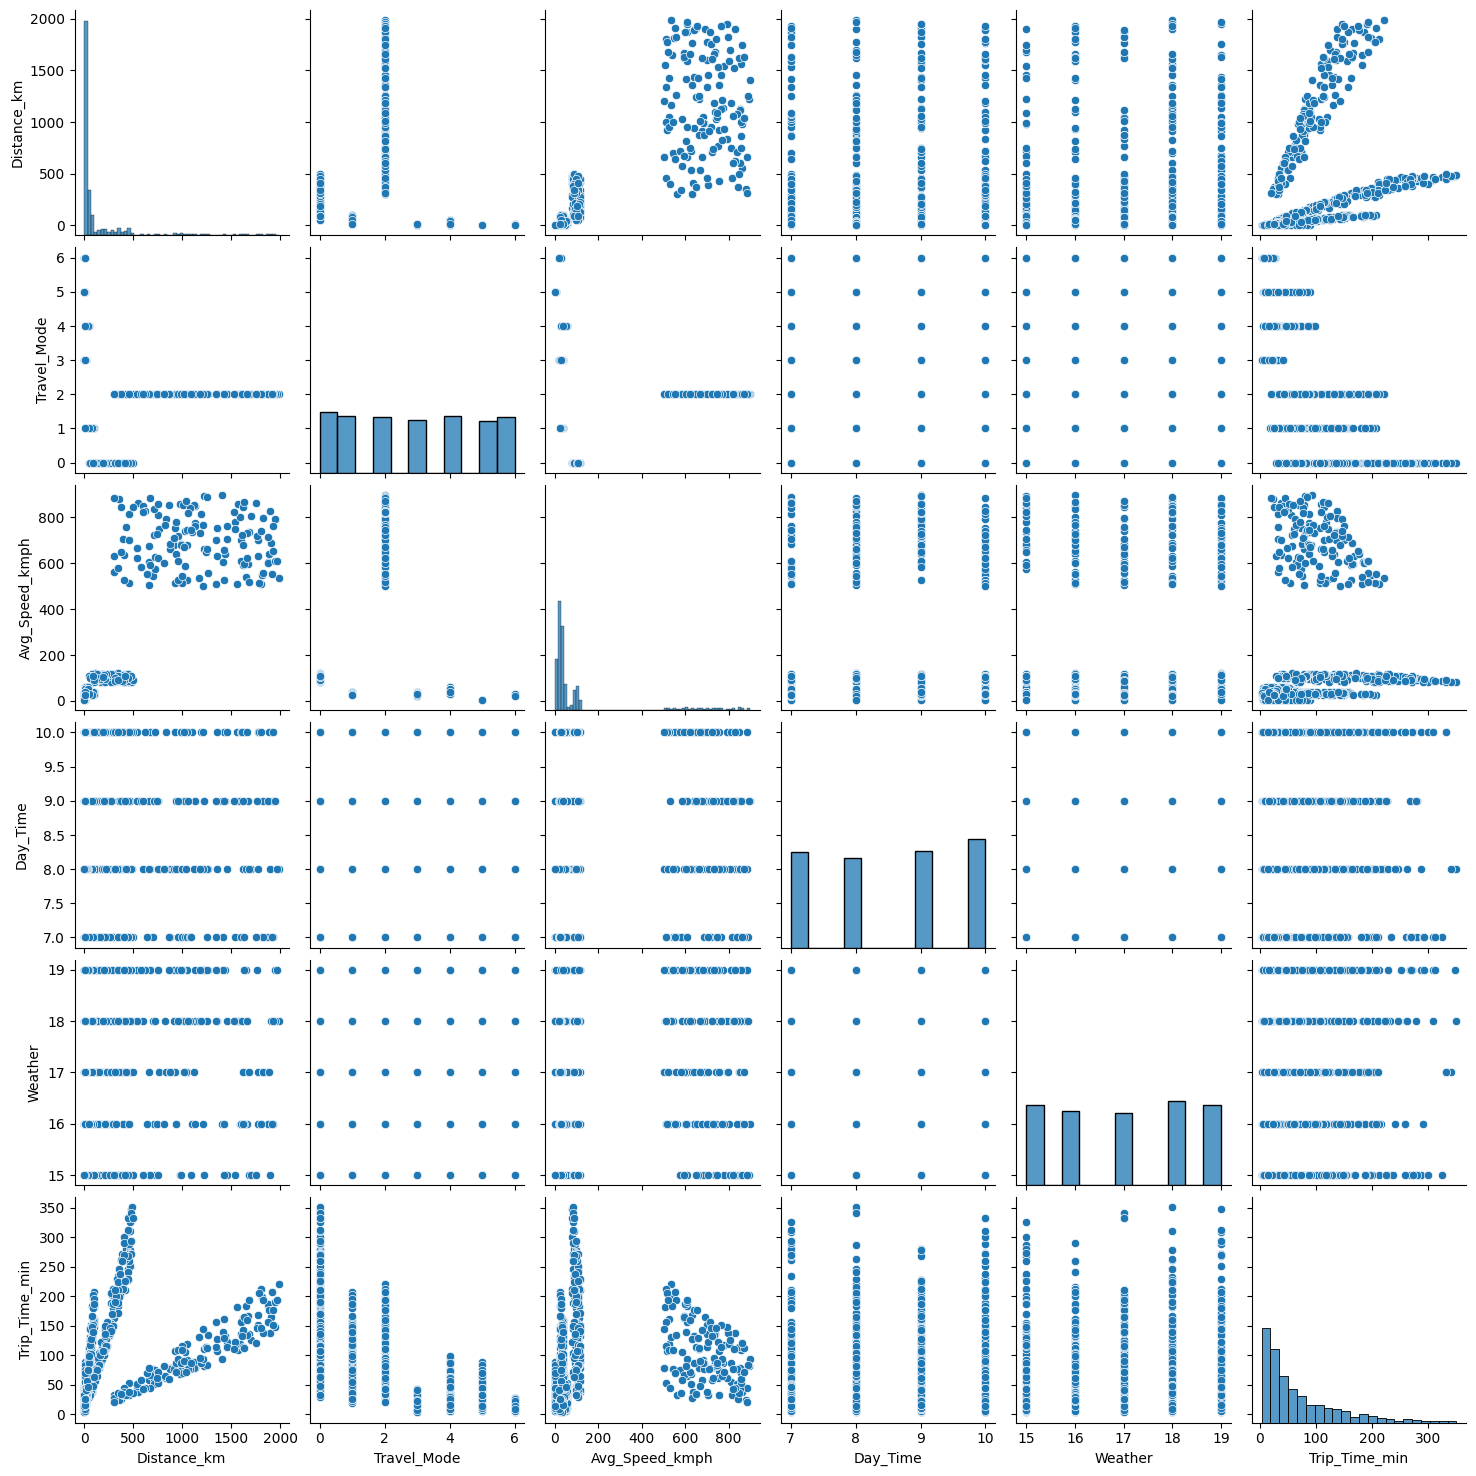

In [27]:
import seaborn as sns
sns.pairplot(df)

In [28]:
df.corr()

,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
Distance_km,1.000000,-0.323712,0.870656,0.005733,0.038090,0.491192
Travel_Mode,-0.323712,1.000000,-0.272699,0.059599,0.006715,-0.683213
Avg_Speed_kmph,0.870656,-0.272699,1.000000,-0.008414,0.045947,0.251310
Day_Time,0.005733,0.059599,-0.008414,1.000000,-0.017284,-0.020549
Weather,0.038090,0.006715,0.045947,-0.017284,1.000000,0.011684
Trip_Time_min,0.491192,-0.683213,0.251310,-0.020549,0.011684,1.000000


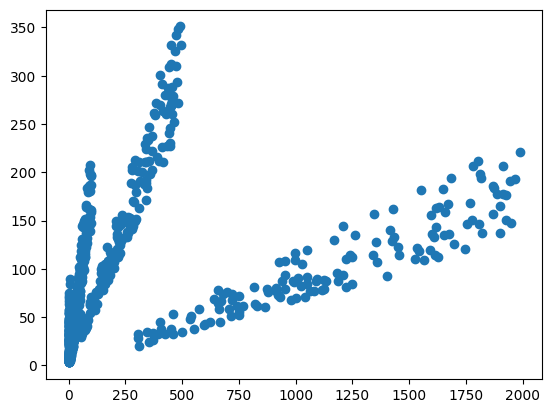

In [29]:
plt.scatter(df['Distance_km'],df['Trip_Time_min'])

In [30]:
df.head()

,Distance_km,Travel_Mode,Avg_Speed_kmph,Day_Time,Weather,Trip_Time_min
0,383,0,84,7,15,272
1,70,1,36,8,16,118
2,459,2,512,7,16,53
3,4,3,20,9,15,13
4,1676,2,735,8,15,136


In [31]:
x = df.drop(['Trip_Time_min'],axis=1)
y = df['Trip_Time_min']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=5))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [39]:
history =model.fit(x_train_scaled,y_train.values,epochs=150,validation_split=0.2)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0000e+00 - loss: 9879.8398 - val_accuracy: 0.0000e+00 - val_loss: 9899.7549
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 9948.4980 - val_accuracy: 0.0000e+00 - val_loss: 9447.9795
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 9157.2842 - val_accuracy: 0.0000e+00 - val_loss: 8079.4932
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 6629.2563 - val_accuracy: 0.0000e+00 - val_loss: 5879.0044
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 5546.9785 - val_accuracy: 0.0000e+00 - val_loss: 5093.8872
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 5119.0342 - val_accuracy: 0.0000e+00 - val_loss: 4660.5698
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 4729.3843 - val_accuracy: 0.0000e+00 - val_loss: 4269.5327
Epoch 8/15

Text(0, 0.5, 'val_loss')

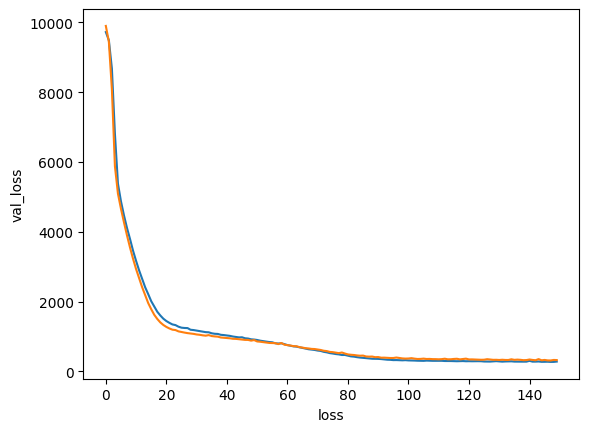

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('val_loss')

In [41]:
def get_user_input():
    distance = float(input("Enter distance in km (e.g., 10.5): "))
    travel_mode = input("Enter travel mode (car/bus/bike/train): ")
    speed = float(input("Enter average speed in km/h (e.g., 30): "))
    day_time = input("Enter time of day (morning/afternoon/evening/night): ")
    weather = input("Enter weather condition (sunny/rainy/cloudy/foggy): ")
    return [[distance, travel_mode, speed, day_time, weather]]

In [42]:
y_pred = model.predict(x_test_scaled)
print("Predicted travel time:", y_pred[0][0])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted travel time: 21.030659


In [43]:
y_pred

array([[ 21.030659],
       [ 19.896038],
       [124.699554],
       [ 35.473198],
       [ 78.749176],
       [ 31.997694],
       [ 33.10178 ],
       [ 34.592354],
       [ 33.653076],
       [ 20.824749],
       [ 16.53893 ],
       [134.3228  ],
       [ 33.112556],
       [ 75.856155],
       [ 22.754715],
       [ 26.022358],
       [128.33386 ],
       [ 78.75449 ],
       [ 17.211935],
       [119.50766 ],
       [ 47.93473 ],
       [ 83.186485],
       [ 44.47863 ],
       [ 17.106712],
       [ 34.819195],
       [ 14.632696],
       [126.70713 ],
       [ 14.652769],
       [ 74.79973 ],
       [ 32.577465],
       [ 35.627804],
       [232.55394 ],
       [ 18.046108],
       [ 39.370472],
       [163.28856 ],
       [100.358185],
       [ 23.08764 ],
       [ 83.78154 ],
       [ 90.75896 ],
       [ 27.159418],
       [ 88.09866 ],
       [ 60.962242],
       [110.313736],
       [ 57.399323],
       [ 79.91341 ],
       [ 35.057217],
       [108.5513  ],
       [ 16.6

In [44]:
user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)
prediction = model.predict(user_input_scaled)
print(f"Predicted Travel Time: {prediction[0][0]:.2f} minutes")


Enter distance in km (e.g., 10.5): 383.80
Enter travel mode (car/bus/bike/train): 0
Enter average speed in km/h (e.g., 30): 84.50
Enter time of day (morning/afternoon/evening/night): 7
Enter weather condition (sunny/rainy/cloudy/foggy): 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Travel Time: 266.24 minutes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9105618000030518